"Este é um Algorítimo de Regressão Linear onde seu objetivo é melhorar a previsão do algorítimo ja existente na empresa. 
nosso foco é chegar ao mais proximo do tempo real de estimação de entrega dada as cisrcunstâncias para a estimação da mesma.

Mercado Livre"


-------------------------------------------------------------------------------------------------------
PASSOS PARA A ENTREGA DO PROJETO:

1 - Importar os dados
2 - Tratar dados (Remover Outliers, linhas vazias, tratamento de valores, etc)
3 -Fazer uma análise descritiva dos dados
4 - Calcular as associações das variáveis (Covariancia, correlação, CV)
5 - Separação dos dados entre teste e treino
6 - Montar o modelo de ML
7 - Calcular MSE, RMSE, R²
8 - Padronizar os dados com Z-Score
9 - Criar validação cruzada





In [2]:
# Importando bibliotecas
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics._regression import r2_score, root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

1 - Importando os Dados

In [3]:
# Importando e lendo a base de dados
data = pd.read_excel(r'Base de Dados\olist_dataset.xlsx', sheet_name='Base_Dados')
data.head(10)

,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delta_time_dataset,error_model_dataset,zip_code_customers,zip_code_sellers,lat_customer,long_customer,lat_seller,long_seller,dist_custommer_seller,product_volume_cm3,Product_weight
0,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1900-01-08 10:17:58,1900-01-07 02:34:47,3149,9350,-2.357853e+16,-4.657859e+15,-2.364660e+15,-4.643578e+16,4.685534e+16,1976,500
1,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1900-01-12 12:03:18,1900-01-05 08:32:15,47813,31570,-1.211790e+16,-4.500422e+15,-1.983805e+14,-4.396900e+14,1.259224e+16,4693,400
2,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1900-01-09 09:11:06,1900-01-17 05:53:31,75265,14840,-1.697817e+16,-4.894453e+15,-2.135335e+15,-4.822946e+15,1.484300e+16,9576,420
3,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1900-01-13 04:42:43,1900-01-12 23:31:18,59296,31842,-5.776793e+15,-3.527295e+15,-1.984496e+16,-4.392220e+15,1.409473e+16,6000,450
4,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1900-01-02 19:56:33,1900-01-09 05:42:58,9195,8752,-2.366994e+16,-4.649137e+15,-2.355979e+16,-4.618230e+15,1.143986e+14,11475,250
5,delivered,2017-07-09 22:10:13,2017-07-26 10:57:55,2017-08-01,1900-01-16 12:47:42,1900-01-05 13:02:05,86320,7112,-2.317200e+15,-5.065979e+16,-2.350239e+15,-4.655534e+15,4.600426e+16,42250,7150
6,delivered,2017-05-16 13:22:11,2017-05-26 12:55:51,2017-06-07,1900-01-09 23:33:40,1900-01-11 11:04:09,26525,12940,-2.282554e+15,-4.341852e+15,-2.311377e+15,-4.655330e+15,3.148009e+14,4352,50
7,delivered,2017-01-25 02:50:47,2017-02-02 14:08:10,2017-03-06,1900-01-08 11:17:23,1900-01-31 09:51:50,99655,13720,-2.755368e+16,-5.252383e+15,-2.160687e+16,-4.688965e+15,5.973434e+15,18375,300
8,delivered,2017-07-29 12:05:32,2017-08-16 17:14:30,2017-08-23,1900-01-18 05:08:58,1900-01-06 06:45:30,18075,8577,-2.347607e+16,-4.746414e+16,-2.353051e+15,-4.634196e+15,4.775549e+16,72324,9750
9,delivered,2017-05-16 19:50:18,2017-05-29 11:18:31,2017-06-07,1900-01-12 15:28:13,1900-01-08 12:41:29,20780,29156,-2.288161e+16,-4.328709e+15,-2.035509e+13,-4.028968e+16,4.261254e+16,19656,9000


2 - Tratando os Dados (part 1)

In [4]:
# Tranformando as colunas de data em formato Datetime
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])


In [5]:
# Calculando as colunas delta_time_dataset(days) error_model_dataset(days)

data['delta_time_dataset(days)'] = np.absolute(data['order_approved_at'] - data['order_delivered_customer_date'])
data['error_model_dataset(days)'] = np.absolute((data['order_estimated_delivery_date'] - data['order_delivered_customer_date']))

# Selecionando somente os dias das colunas criadas anteriormente
data['delta_time_dataset(days)'] = data['delta_time_dataset(days)'].dt.days
data['error_model_dataset(days)'] = data['error_model_dataset(days)'].dt.days

In [6]:
data.head(5)

,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,delta_time_dataset,error_model_dataset,zip_code_customers,zip_code_sellers,lat_customer,long_customer,lat_seller,long_seller,dist_custommer_seller,product_volume_cm3,Product_weight,delta_time_dataset(days),error_model_dataset(days)
0,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1900-01-08 10:17:58,1900-01-07 02:34:47,3149,9350,-2.357853e+16,-4.657859e+15,-2.364660e+15,-4.643578e+16,4.685534e+16,1976,500,8,7
1,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1900-01-12 12:03:18,1900-01-05 08:32:15,47813,31570,-1.211790e+16,-4.500422e+15,-1.983805e+14,-4.396900e+14,1.259224e+16,4693,400,12,5
2,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1900-01-09 09:11:06,1900-01-17 05:53:31,75265,14840,-1.697817e+16,-4.894453e+15,-2.135335e+15,-4.822946e+15,1.484300e+16,9576,420,9,17
3,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1900-01-13 04:42:43,1900-01-12 23:31:18,59296,31842,-5.776793e+15,-3.527295e+15,-1.984496e+16,-4.392220e+15,1.409473e+16,6000,450,13,12
4,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1900-01-02 19:56:33,1900-01-09 05:42:58,9195,8752,-2.366994e+16,-4.649137e+15,-2.355979e+16,-4.618230e+15,1.143986e+14,11475,250,2,9


In [7]:
# Selecionando os dados de Interesse
data = data.iloc[:, [8, 9, 10, 11, 13, 14, 15, 16]]
data

,lat_customer,long_customer,lat_seller,long_seller,product_volume_cm3,Product_weight,delta_time_dataset(days),error_model_dataset(days)
0,-2.357853e+16,-4.657859e+15,-2.364660e+15,-4.643578e+16,1976,500,8,7
1,-1.211790e+16,-4.500422e+15,-1.983805e+14,-4.396900e+14,4693,400,12,5
2,-1.697817e+16,-4.894453e+15,-2.135335e+15,-4.822946e+15,9576,420,9,17
3,-5.776793e+15,-3.527295e+15,-1.984496e+16,-4.392220e+15,6000,450,13,12
4,-2.366994e+16,-4.649137e+15,-2.355979e+16,-4.618230e+15,11475,250,2,9
...,...,...,...,...,...,...,...,...
88566,-2.296396e+16,-4.553827e+15,-2.295669e+16,-4.654087e+15,5148,1175,8,10
88567,-2.401353e+16,-4.645853e+15,-2.192905e+16,-5.049978e+15,16000,4950,22,1
88568,-1.645420e+16,-3.906439e+15,-2.354550e+15,-4.644795e+15,63360,13300,24,5
88569,-2.232442e+16,-4.254638e+15,-2.155175e+16,-4.574189e+16,8000,6550,17,20


Para Calcular a distancia em Km das coordenadas, usamos a Fórmula de Haversina
https://pt.wikipedia.org/wiki/F%C3%B3rmula_de_haversine


In [8]:
# transformando as coordenadas em Radianos

data['lat_customer'] = data['lat_customer'].apply(math.radians)
data['long_customer'] = data['long_customer'].apply(math.radians)
data['lat_seller'] = data['lat_seller'].apply(math.radians)
data['long_seller'] = data['long_customer'].apply(math.radians)

#Calculando as diferenças entre as coordenadas
data['dif_lat'] = data['lat_customer'] - data['lat_seller']
data['dif_long'] = data['long_customer'] - data['long_seller']

# Calculando os termos da formula de Haversine
data['a'] = data.apply(lambda row: (math.sin((row['dif_lat']/2))**2 + math.cos(row['lat_customer']) * math.cos(row['long_seller']) + math.sin(row['dif_long']/2)**2 ), axis = 1 )
data['c'] = data.apply(lambda row: (2 * math.atan2( math.sqrt(np.absolute(row['a'])), math.sqrt(np.absolute(1 - row['a'])))), axis = 1)

# Calculando a distância entre o consumidor e comprador em Km onde o raio da terra r = 6371 km
data['dist_customer_seller_km'] = 6371 * data['c']
data

,lat_customer,long_customer,lat_seller,long_seller,product_volume_cm3,Product_weight,delta_time_dataset(days),error_model_dataset(days),dif_lat,dif_long,a,c,dist_customer_seller_km
0,-4.115229e+14,-8.129498e+13,-4.127111e+13,-1.418865e+12,1976,500,8,7,-3.702518e+14,-7.987611e+13,1.565566,2.059219,13119.287306
1,-2.114972e+14,-7.854718e+13,-3.462393e+12,-1.370907e+12,4693,400,12,5,-2.080348e+14,-7.717627e+13,0.067857,0.527067,3357.945739
2,-2.963249e+14,-8.542433e+13,-3.726863e+13,-1.490936e+12,9576,420,9,17,-2.590563e+14,-8.393339e+13,0.330190,1.224283,7799.906027
3,-1.008241e+14,-6.156291e+13,-3.463598e+14,-1.074475e+12,6000,450,13,12,2.455358e+14,-6.048843e+13,2.047927,1.899707,12103.035964
4,-4.131183e+14,-8.114274e+13,-4.111959e+14,-1.416208e+12,11475,250,2,9,-1.922385e+12,-7.972653e+13,1.012797,2.917718,18588.778487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88566,-4.007967e+14,-7.947927e+13,-4.006698e+14,-1.387175e+12,5148,1175,8,10,-1.268471e+11,-7.809209e+13,0.141497,0.771300,4913.952725
88567,-4.191152e+14,-8.108543e+13,-3.827342e+14,-1.415208e+12,16000,4950,22,1,-3.638103e+13,-7.967022e+13,2.150650,1.878542,11968.191474
88568,-2.871800e+14,-6.818022e+13,-4.109465e+13,-1.189969e+12,63360,13300,24,5,-2.460853e+14,-6.699026e+13,0.595389,1.762750,11230.482292
88569,-3.896346e+14,-7.425745e+13,-3.761489e+14,-1.296037e+12,8000,6550,17,20,-1.348569e+13,-7.296141e+13,0.347917,1.261734,8038.507447


In [9]:
# filtrando as colunas de Interesse
data = data.iloc[:, [4, 5, 6, 7, 12]]
data

,product_volume_cm3,Product_weight,delta_time_dataset(days),error_model_dataset(days),dist_customer_seller_km
0,1976,500,8,7,13119.287306
1,4693,400,12,5,3357.945739
2,9576,420,9,17,7799.906027
3,6000,450,13,12,12103.035964
4,11475,250,2,9,18588.778487
...,...,...,...,...,...
88566,5148,1175,8,10,4913.952725
88567,16000,4950,22,1,11968.191474
88568,63360,13300,24,5,11230.482292
88569,8000,6550,17,20,8038.507447


In [10]:
# removendo linhas vazias
data.dropna()

,product_volume_cm3,Product_weight,delta_time_dataset(days),error_model_dataset(days),dist_customer_seller_km
0,1976,500,8,7,13119.287306
1,4693,400,12,5,3357.945739
2,9576,420,9,17,7799.906027
3,6000,450,13,12,12103.035964
4,11475,250,2,9,18588.778487
...,...,...,...,...,...
88566,5148,1175,8,10,4913.952725
88567,16000,4950,22,1,11968.191474
88568,63360,13300,24,5,11230.482292
88569,8000,6550,17,20,8038.507447


count     88571.000000
mean      15026.976358
std       23040.577790
min           0.000000
25%        2816.000000
50%        6384.000000
75%       18000.000000
max      296208.000000
Name: product_volume_cm3, dtype: float64


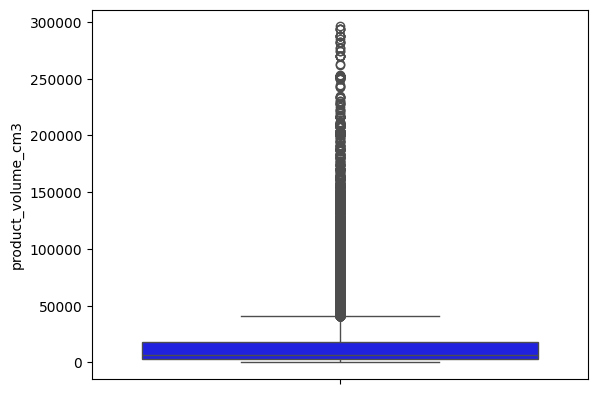

count    88571.000000
mean      2071.559890
std       3702.003232
min          0.000000
25%        300.000000
50%        675.000000
75%       1800.000000
max      40425.000000
Name: Product_weight, dtype: float64


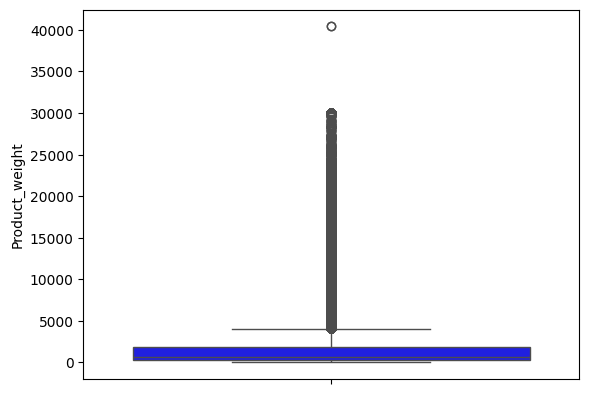

count    88571.000000
mean         9.984002
std          6.153413
min          0.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         69.000000
Name: delta_time_dataset(days), dtype: float64


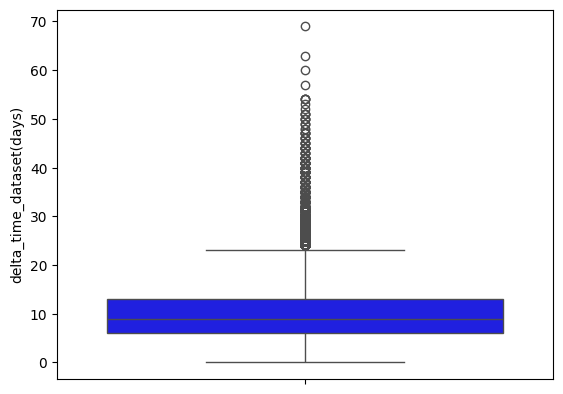

count    88571.000000
mean        12.707523
std          7.369869
min          0.000000
25%          7.000000
50%         12.000000
75%         17.000000
max        146.000000
Name: error_model_dataset(days), dtype: float64


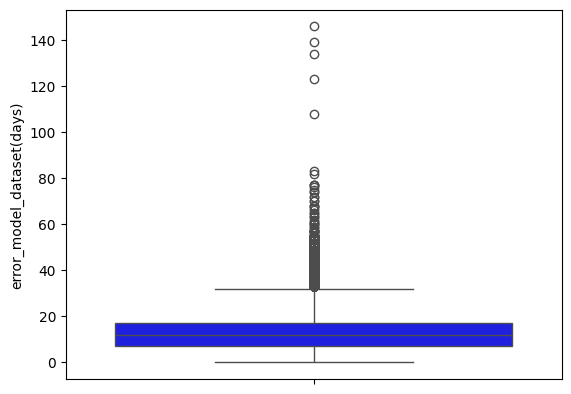

count    88557.000000
mean     11944.408042
std       3914.782702
min        145.533772
25%      10181.729785
50%      12680.021623
75%      14433.615236
max      19983.938187
Name: dist_customer_seller_km, dtype: float64


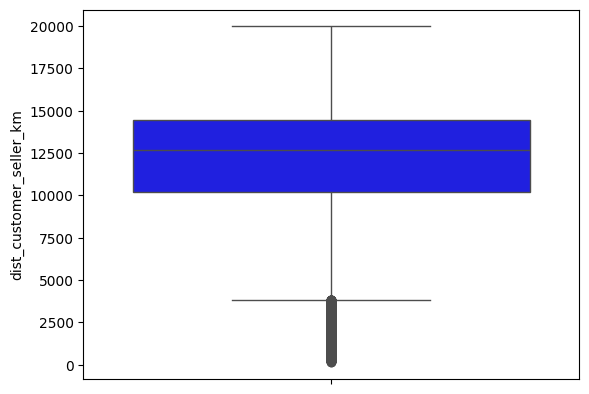

In [11]:
# Identificando Outliers
for c in data:
    # Descrevendo os dados
    print(data[c].describe())

    fig = sns.boxplot(data = data[c], color = 'blue')
    plt.show(fig)


C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\3948883961.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q1_product_volume = float(data['product_volume_cm3'].quantile([0.25]))


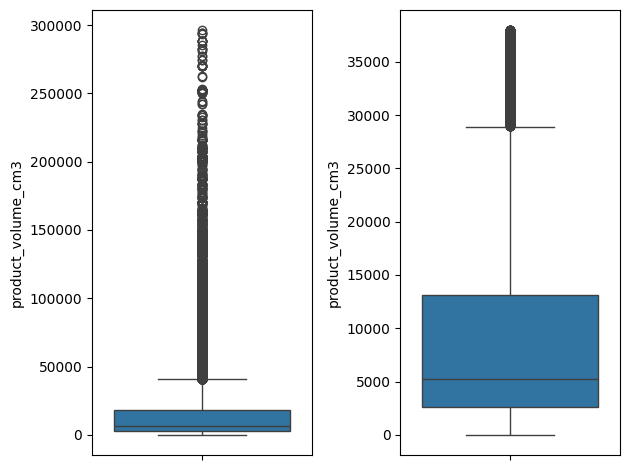

In [12]:
# Retirando os Outliers de cada variável

q1_product_volume = float(data['product_volume_cm3'].quantile([0.25]))
q3_product_volume = float(data['product_volume_cm3'].quantile(0.75))
IQR_product_volume = float(q3_product_volume - q1_product_volume)

product_volume = data['product_volume_cm3'] < IQR_product_volume + 1.5 * IQR_product_volume
product_volume = data.loc[product_volume, 'product_volume_cm3']


fig, axes = plt.subplots(nrows = 1, ncols = 2)

fig_antes = sns.boxplot(data['product_volume_cm3'], ax = axes[0])
fig_depois = sns.boxplot(product_volume, ax = axes[1])

plt.tight_layout()
plt.show()


C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\2605311660.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q1_product_weight = float(data['Product_weight'].quantile([0.25]))


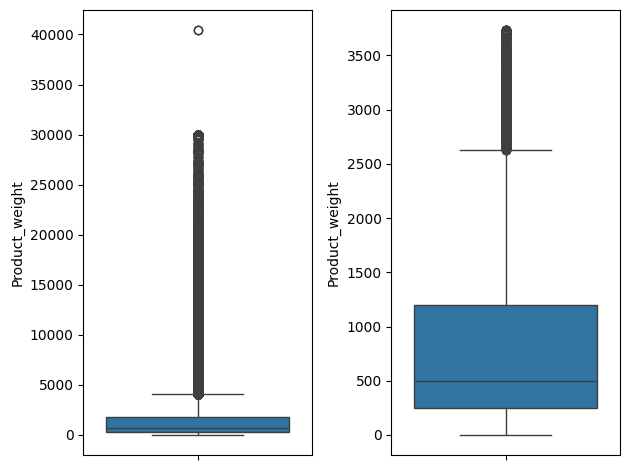

In [13]:
q1_product_weight = float(data['Product_weight'].quantile([0.25]))
q3_product_weight = float(data['Product_weight'].quantile(0.75))
IQR_product_weight = float(q3_product_weight - q1_product_weight)

product_weight = data['Product_weight'] < IQR_product_weight + 1.5 * IQR_product_weight
product_weight = data.loc[product_weight, 'Product_weight']


fig, axes = plt.subplots(nrows = 1, ncols = 2)

fig_antes = sns.boxplot(data['Product_weight'], ax = axes[0])
fig_depois = sns.boxplot(product_weight, ax = axes[1])

plt.tight_layout()
plt.show()

C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\1362477086.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q1_dist_customer_seller = float(data['dist_customer_seller_km'].quantile([0.25]))
C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\1362477086.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q3_dist_customer_seller = float(data['dist_customer_seller_km'].quantile([0.75]))


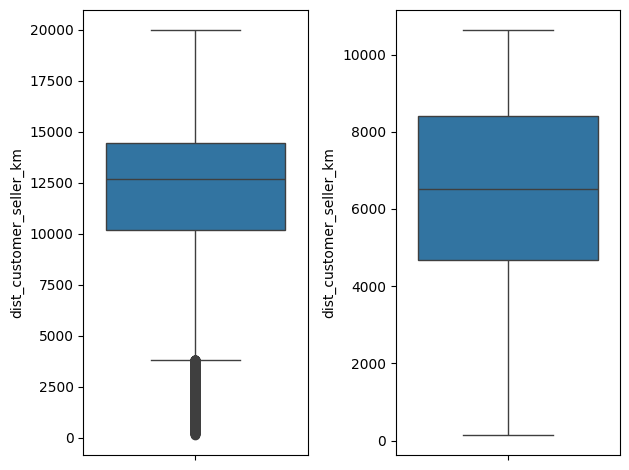

In [14]:
q1_dist_customer_seller = float(data['dist_customer_seller_km'].quantile([0.25]))
q3_dist_customer_seller = float(data['dist_customer_seller_km'].quantile([0.75]))
IQR_dist_customer_seller = float(q3_dist_customer_seller - q1_dist_customer_seller)

dist_customer_seller = data['dist_customer_seller_km'] < IQR_dist_customer_seller + 1.5 * IQR_dist_customer_seller 
dist_customer_seller = data.loc[dist_customer_seller, 'dist_customer_seller_km']

fig, axes = plt.subplots(nrows = 1, ncols = 2)

fig_antes = sns.boxplot(data['dist_customer_seller_km'], ax = axes[0])
fig_depois = sns.boxplot(dist_customer_seller, ax = axes[1])

plt.tight_layout()
plt.show()

C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\3889910975.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q1_delta_time = float(data['delta_time_dataset(days)'].quantile([0.25]))
C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\3889910975.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q3_delta_time = float(data['delta_time_dataset(days)'].quantile([0.75]))


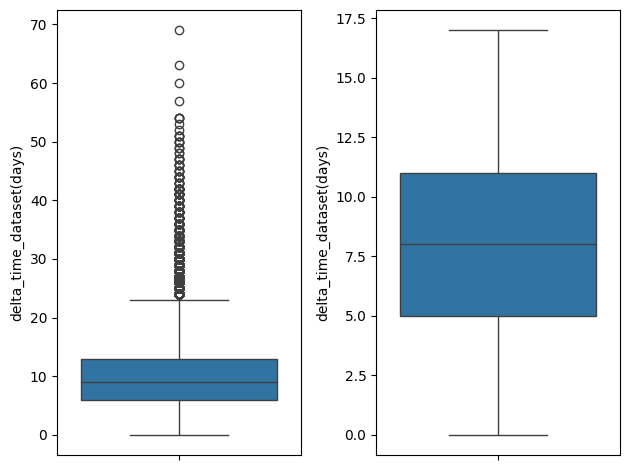

In [15]:
q1_delta_time = float(data['delta_time_dataset(days)'].quantile([0.25]))
q3_delta_time = float(data['delta_time_dataset(days)'].quantile([0.75]))
IQR_delta_time = float(q3_delta_time - q1_delta_time)

delta_time = data['delta_time_dataset(days)'] < IQR_delta_time + 1.5 * IQR_delta_time
delta_time = data.loc[delta_time, 'delta_time_dataset(days)']

fig, axes = plt.subplots(nrows= 1, ncols = 2)

fig_antes = sns.boxplot(data['delta_time_dataset(days)'], ax = axes[0])
fig_depois = sns.boxplot(delta_time, ax = axes[1])

plt.tight_layout()
plt.show()

C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\607238227.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q1_error_model = float(data['error_model_dataset(days)'].quantile([0.25]))
C:\Users\Instituto\AppData\Local\Temp\ipykernel_2688\607238227.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  q3_error_model = float(data['error_model_dataset(days)'].quantile([0.75]))


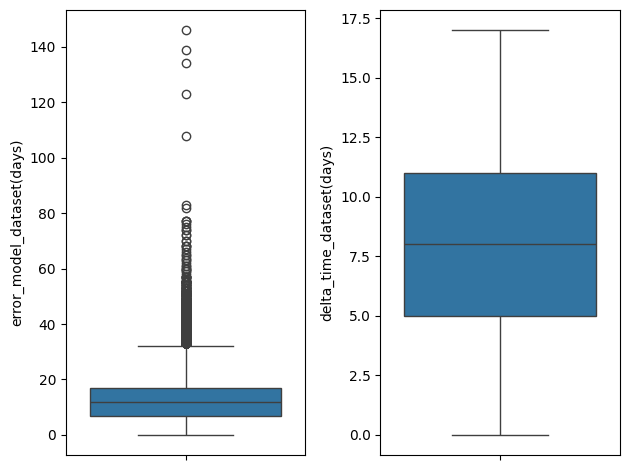

In [16]:
q1_error_model = float(data['error_model_dataset(days)'].quantile([0.25]))
q3_error_model = float(data['error_model_dataset(days)'].quantile([0.75]))
IQR_error_model = float(q3_error_model - q1_error_model)

error_model = data['error_model_dataset(days)'] < IQR_delta_time + 1.5 * IQR_delta_time
error_model = data.loc[delta_time, 'error_model_dataset(days)']

fig, axes = plt.subplots(nrows= 1, ncols = 2)

fig_antes = sns.boxplot(data['error_model_dataset(days)'], ax = axes[0])
fig_depois = sns.boxplot(delta_time, ax = axes[1])

plt.tight_layout()
plt.show()

In [17]:
# Criando um Dataframe com as colunas filtradas e tratadas
dados = {
    'product_volume_cm3': product_volume.reset_index(drop = True),
    'product_weight_kg': product_weight.reset_index(drop = True),
    'dist_customer_seller_km': dist_customer_seller.reset_index(drop = True),
    'delta_time_days': delta_time.reset_index(drop = True),
    'error_model_days': error_model.reset_index(drop = True)
}

data = pd.DataFrame.from_dict(dados)
data.dropna()

data

,product_volume_cm3,product_weight_kg,dist_customer_seller_km,delta_time_days,error_model_days
0,1976,500.0,3357.945739,8.0,6.0
1,4693,400.0,7799.906027,12.0,8.0
2,9576,420.0,10152.800723,9.0,8.0
3,6000,450.0,10190.237846,13.0,8.0
4,11475,250.0,4517.058349,2.0,17.0
...,...,...,...,...,...
79854,26117,NaN,NaN,NaN,NaN
79855,5148,NaN,NaN,NaN,NaN
79856,16000,NaN,NaN,NaN,NaN
79857,8000,NaN,NaN,NaN,NaN


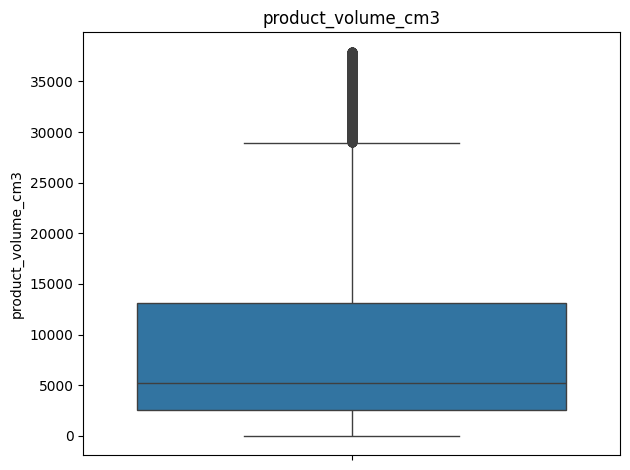

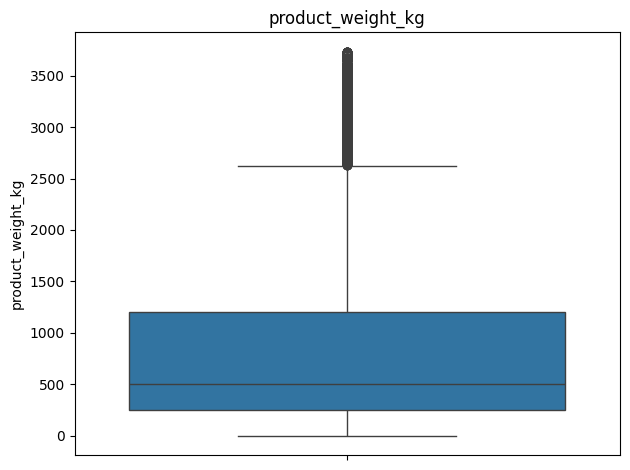

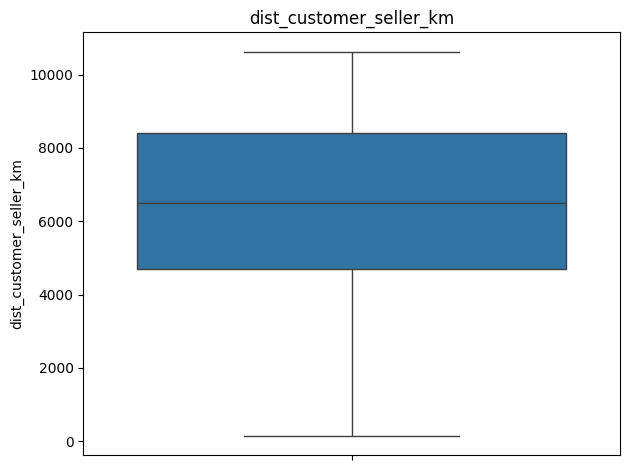

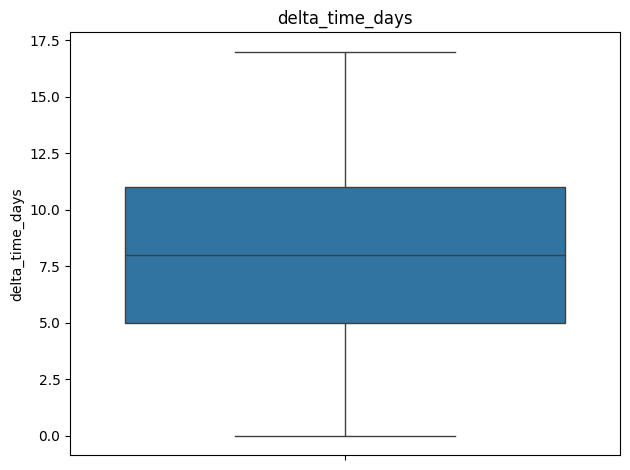

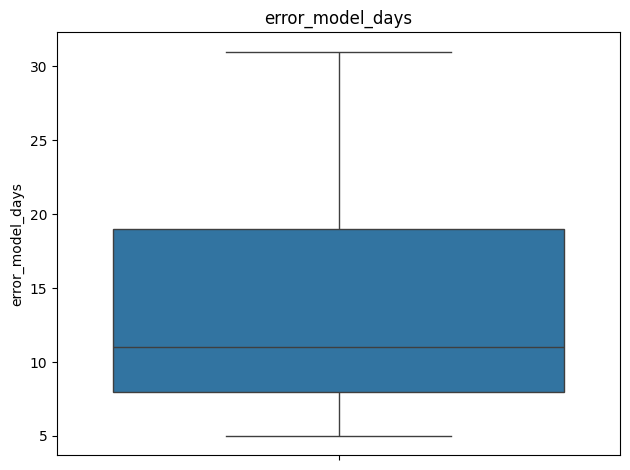

In [18]:
# Validando se todos os outliers foram removidos

for c in data:
    sns.boxplot(data[c])
    plt.title(f'{c}')
    plt.tight_layout()
    plt.show()

    i =+ 1

REALIZANDO A ANÁLISE DESCRITIVA

Cálculos de medidas de posição e dispersão, além da construção de gráficos de dispersão, distribuição para cada variável afim de entendermos com quais dados estamos lidando,
além de encontrarmos padrões nos dados

product_volume_cm3

count    79859.000000
mean      9080.643572
std       8977.999245
min          0.000000
25%       2592.000000
50%       5236.000000
75%      13125.000000
max      37950.000000
Name: product_volume_cm3, dtype: float64
A média de product_volume_cm3 é:  9080.64357179529
Sua variância é de:  80604470.44614975
Seu desvio padrão é de:  8977.999245163131


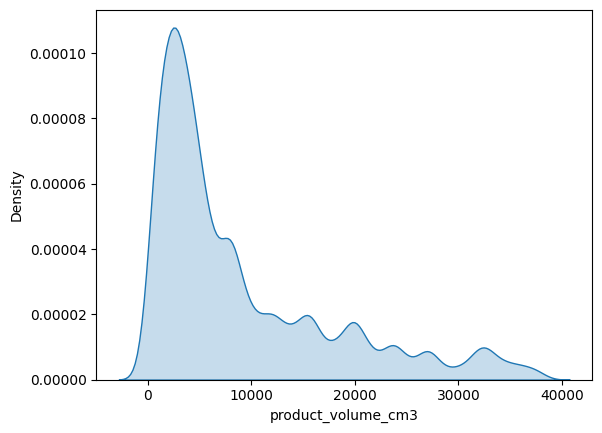

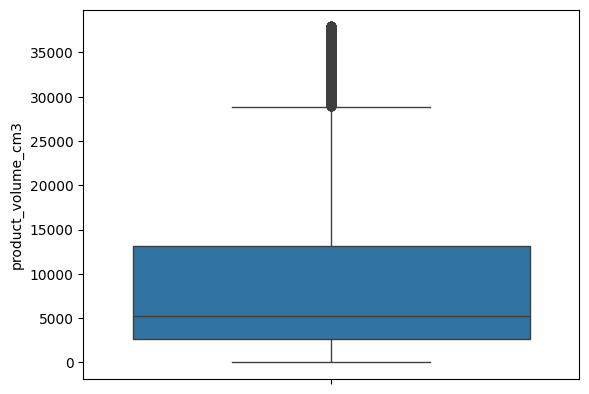

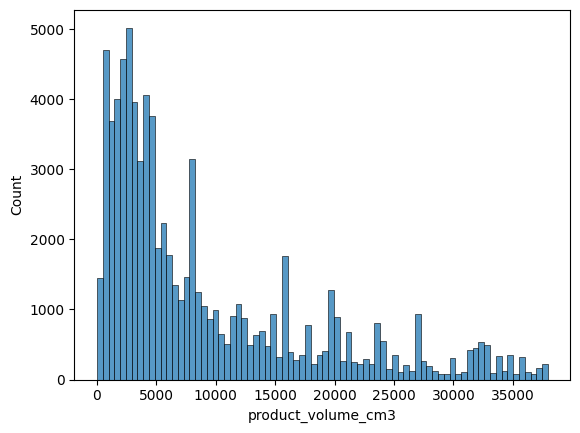

product_weight_kg

count    75509.000000
mean       824.292376
std        778.829346
min          0.000000
25%        250.000000
50%        501.000000
75%       1200.000000
max       3733.000000
Name: product_weight_kg, dtype: float64
A média de product_weight_kg é:  824.2923757432889
Sua variância é de:  606575.150477045
Seu desvio padrão é de:  778.8293461837741


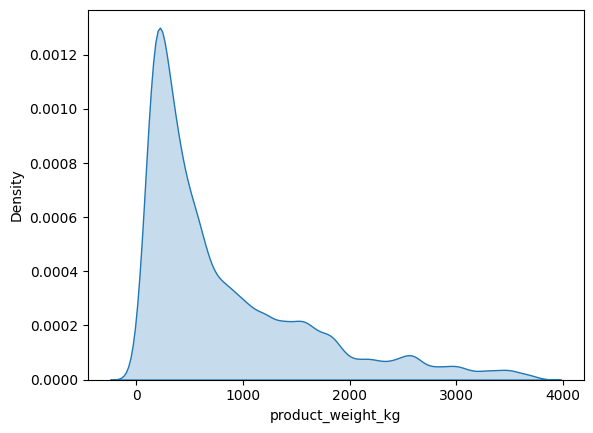

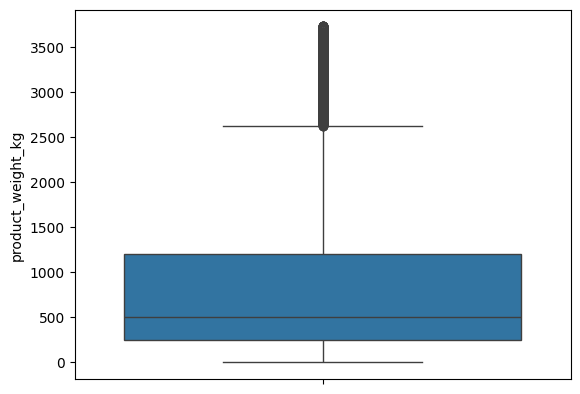

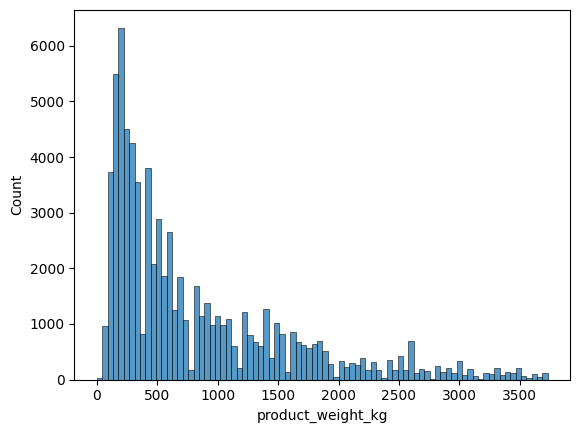

dist_customer_seller_km

count    23523.000000
mean      6442.250099
std       2463.047795
min        145.533772
25%       4686.143404
50%       6510.590866
75%       8417.439641
max      10629.242826
Name: dist_customer_seller_km, dtype: float64
A média de dist_customer_seller_km é:  6442.2500992970445
Sua variância é de:  6066604.439154697
Seu desvio padrão é de:  2463.0477947361674


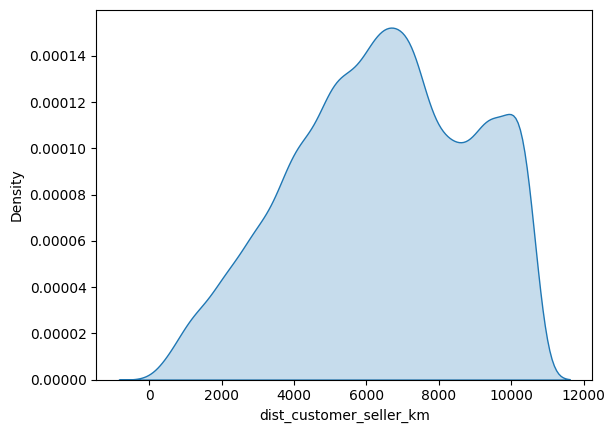

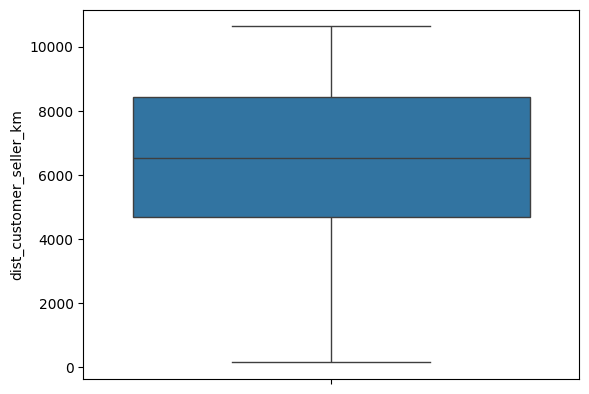

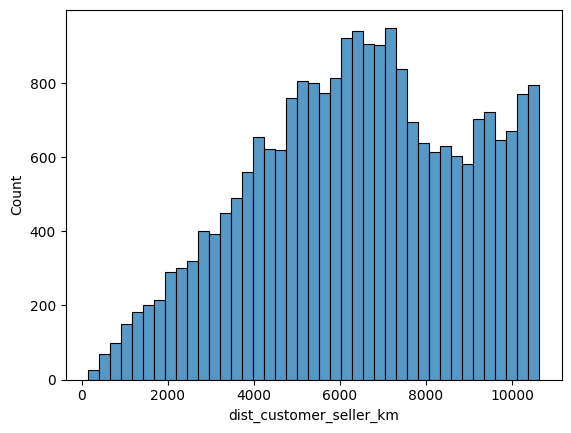

delta_time_days

count    78124.000000
mean         8.344593
std          4.162468
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         17.000000
Name: delta_time_days, dtype: float64
A média de delta_time_days é:  8.344593210793098
Sua variância é de:  17.326142188244678
Seu desvio padrão é de:  4.162468280749377


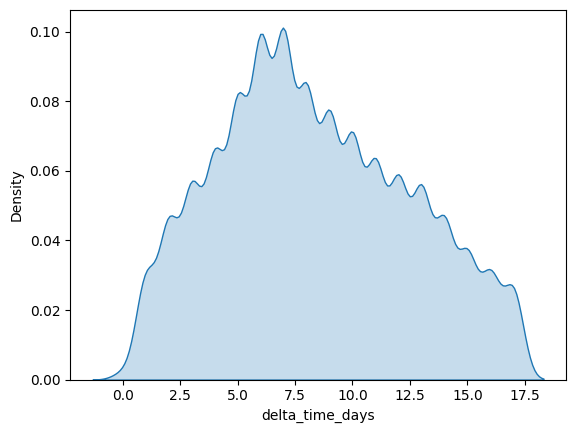

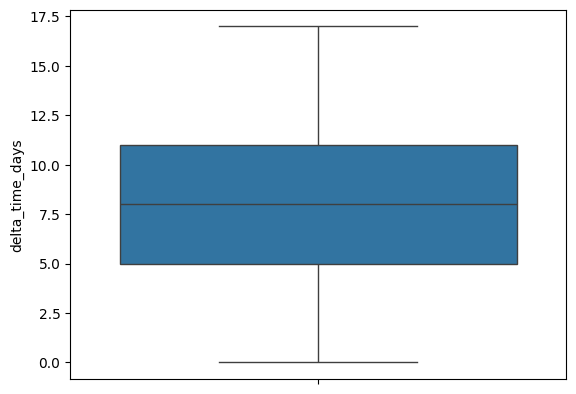

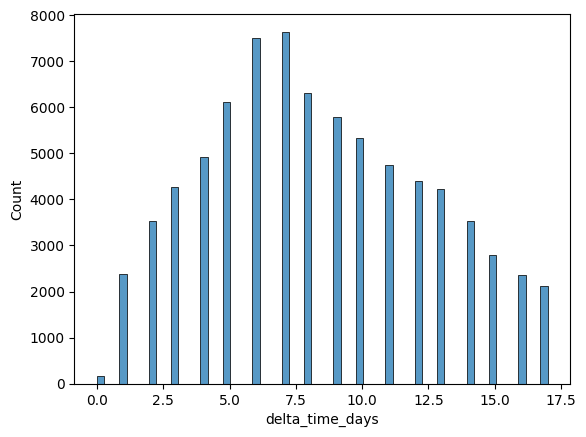

error_model_days

count    78124.000000
mean        13.665455
std          8.186092
min          5.000000
25%          8.000000
50%         11.000000
75%         19.000000
max         31.000000
Name: error_model_days, dtype: float64
A média de error_model_days é:  13.665454917822949
Sua variância é de:  67.012100530346
Seu desvio padrão é de:  8.186091896035984


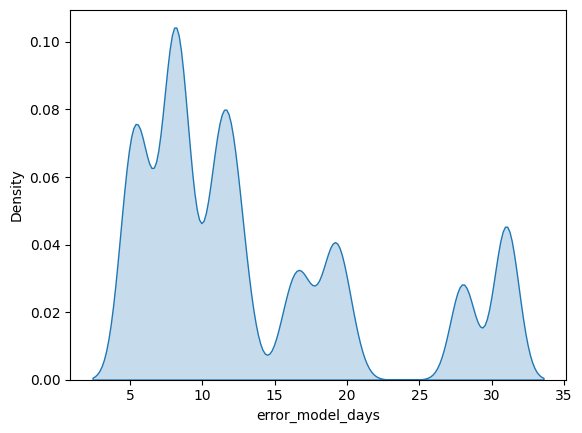

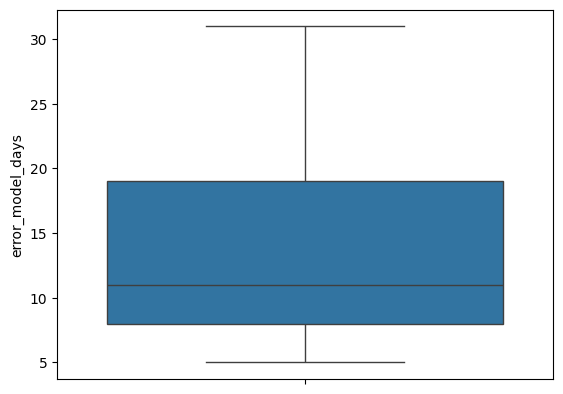

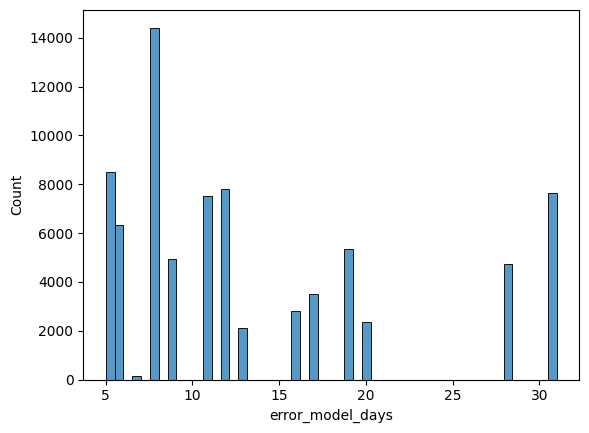

In [19]:
# descrissão das variáveis (Medidas de posição e dispersão)

for c in data:

    print(c)
    print()

    print(data[c].describe())
    print(f'A média de {c} é: ', data[c].mean(), end = '\n')
    print(f'Sua variância é de: ', data[c].var(), end = '\n')
    print('Seu desvio padrão é de: ', data[c].std(), end = '\n')

    sns.kdeplot(data[c], fill= True)
    plt.show()
    sns.boxplot(data[c])
    plt.show()
    sns.histplot(data[c])
    plt.show()
    


In [20]:
# Criando graficos de associações com a variável resposta

# Criando a matriz de correlação
matriz_correlacao = data.corr()
matriz_covariancia = data.cov()

matriz_correlacao

,product_volume_cm3,product_weight_kg,dist_customer_seller_km,delta_time_days,error_model_days
product_volume_cm3,1.000000,0.005737,-0.007018,0.000656,0.004259
product_weight_kg,0.005737,1.000000,0.009140,-0.003308,-0.003578
dist_customer_seller_km,-0.007018,0.009140,1.000000,0.004053,-0.002866
delta_time_days,0.000656,-0.003308,0.004053,1.000000,0.150913
error_model_days,0.004259,-0.003578,-0.002866,0.150913,1.000000


In [21]:
matriz_covariancia

,product_volume_cm3,product_weight_kg,dist_customer_seller_km,delta_time_days,error_model_days
product_volume_cm3,8.060447e+07,40115.468035,-1.552328e+05,24.546104,313.299902
product_weight_kg,4.011547e+04,606575.150477,1.749505e+04,-10.716089,-22.824768
dist_customer_seller_km,-1.552328e+05,17495.054173,6.066604e+06,41.365560,-57.827667
delta_time_days,2.454610e+01,-10.716089,4.136556e+01,17.326142,5.142254
error_model_days,3.132999e+02,-22.824768,-5.782767e+01,5.142254,67.012101


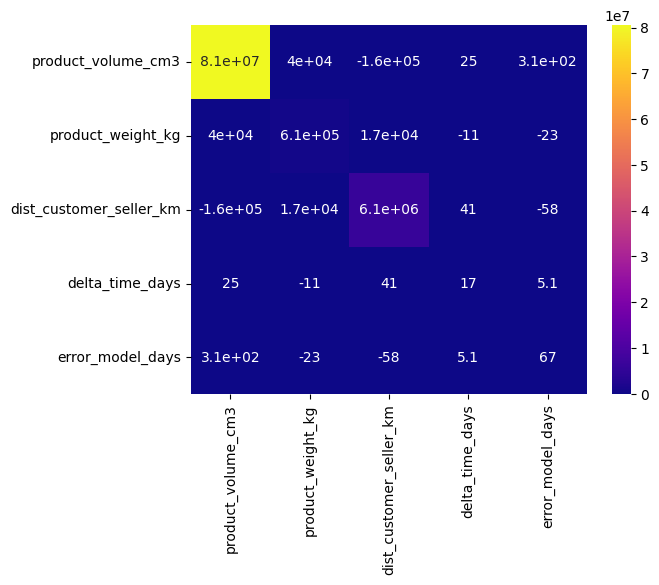

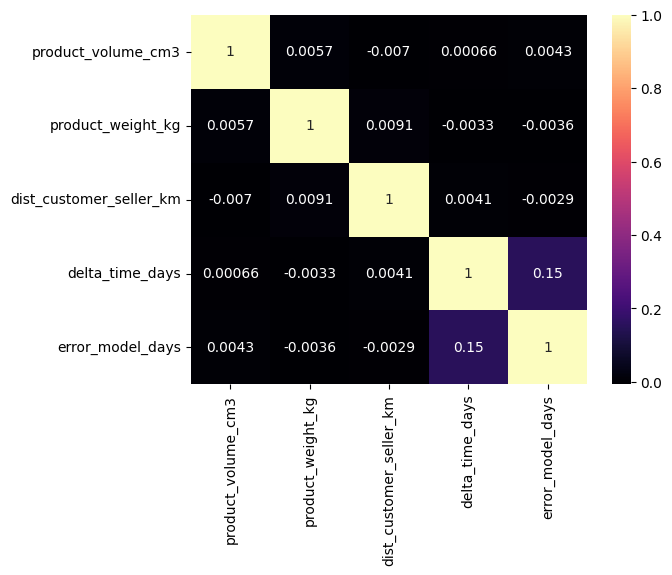

In [22]:
# Heatmap para cada matriz para entendermos de forma mais visual as associações entre as variáveis

sns.heatmap(matriz_covariancia, annot = True, cmap = 'plasma')
plt.show()

sns.heatmap(matriz_correlacao, annot = True, cmap = 'magma')
plt.show()

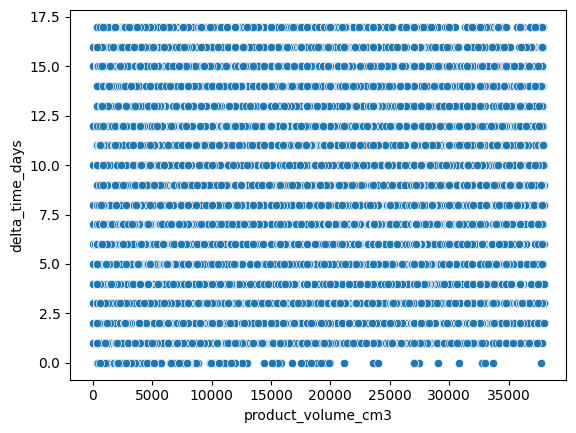

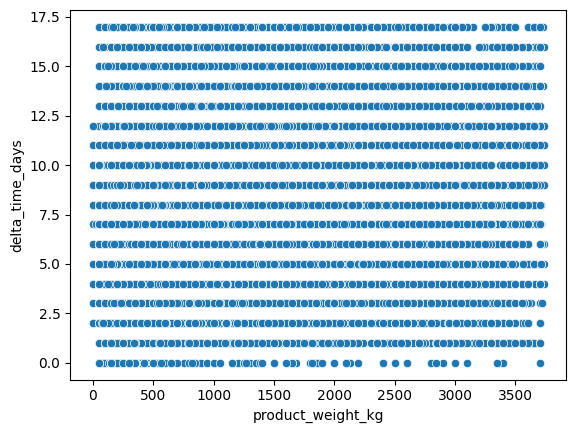

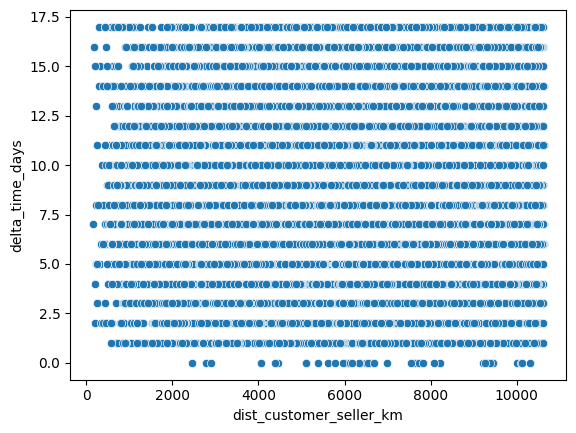

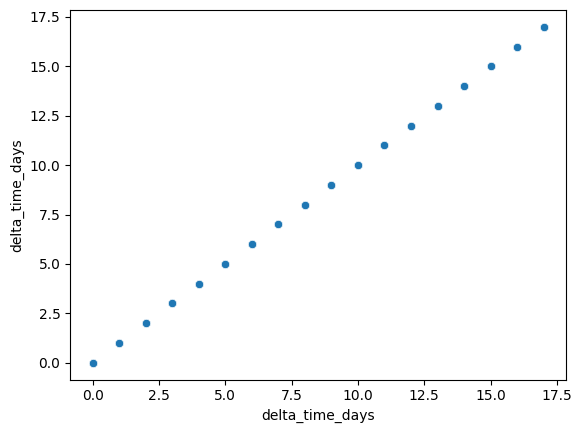

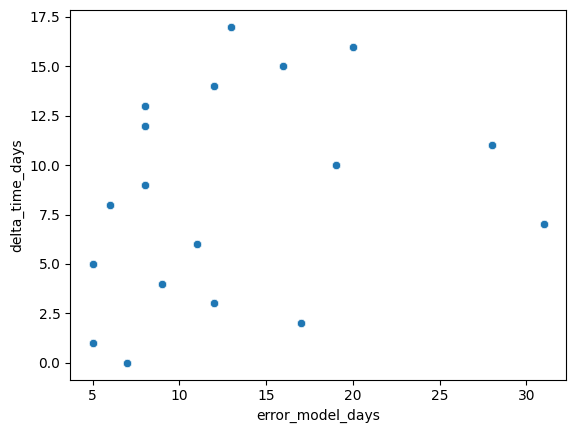

In [23]:
for c in data:
    sns.scatterplot(data = data, x = c, y = 'delta_time_days')
    plt.show()

Concluímos que, pelas análises feitas até então, não é possível estimar com precisão o tempo de entrega com estes dados, pois as correlações e associações entre as variáveis
independentes com a variável resposta são muito fracas. Iremos realizar um treino com um modelo de regressão Linear e Random Florest para ver qual modelo é o melhor neste caso

In [ ]:
# Linear regression
data.dropna()

# Variável resposta
y = data['delta_time_days'].values.reshape(-1, 1)

x1 = data['product_volume_cm3'].values.reshape(-1, 1)
x2 = data['product_weight_kg'].values.reshape(-1, 1)
x3 = data['dist_customer_seller_km'].values.reshape(-1, 1)

# Variável Explicativa
x = np.hstack((x1, x2, x3))

#Tratando dados vazios
imputer = SimpleImputer(strategy= 'mean')
x = imputer.fit_transform(x)

y = imputer.fit_transform(y)

x_teste, x_treino, y_teste, y_treino = train_test_split(x, y, test_size= 0.7, random_state= 42)

reg = LinearRegression()
reg.fit(x_treino, y_treino)

LinearRegression()

In [25]:
# Analisando os resultados da Regressão
print(reg.coef_)
print(reg.intercept_,)
print()
print(f'y = {reg.intercept_[0]} + {reg.coef_[0][0]} * product_volume + {reg.coef_[0][1]} * produc_weight + {reg.coef_[0][2]} * dist_customer_seller')

[[ 1.33539129e-06 -3.50265737e-06  8.62771866e-06]]
[8.27371374]

y = 8.273713739457929 + 1.3353912936779646e-06 * product_volume + -3.5026573652982697e-06 * produc_weight + 8.627718660552885e-06 * dist_customer_seller


In [26]:

# Realizando a Previsão
y_estimado = reg.predict(x_teste)

print(y_estimado, y_teste)

# Analisando erros
print('RMSE', root_mean_squared_error(y_teste, y_estimado))
print('R²', r2_score(y_teste, y_estimado))
print('MSE', mean_absolute_error(y_teste, y_estimado))

[[8.33590506]
 [8.35018031]
 [8.33939405]
 ...
 [8.33290379]
 [8.30492172]
 [8.35950753]] [[13.]
 [14.]
 [ 8.]
 ...
 [ 1.]
 [ 7.]
 [ 4.]]
RMSE 4.141995998085529
R² -4.934367000664075e-05
MSE 3.428559166679464


In [27]:
y_estimado = y_estimado.flatten()

dados = {
    'delta_time': delta_time.reset_index(drop = True),
    'error_model': error_model.reset_index(drop = True),
    'previsao': pd.Series(y_estimado).reset_index(drop = True)
}

modelo = pd.DataFrame.from_dict(dados)
modelo


,delta_time,error_model,previsao
0,8,6,8.335905
1,12,8,8.350180
2,9,8,8.339394
3,13,8,8.313279
4,2,17,8.330413
...,...,...,...
78119,11,28,NaN
78120,11,28,NaN
78121,8,6,NaN
78122,17,13,NaN


In [42]:
# realizando uma previsão de Regressão Linear com os dados Reais 
previsao_real_RL = reg.predict(x)

In [44]:
# Criando um dataframe com as previsões do modelo de regressão Linear
dados_RL = {
    'delta_time': y.flatten(),
    'modelo_regressão': previsao_real_RL.flatten(),
    'error_modelo': pd.Series(pd.Series(y.flatten()) - pd.Series(previsao_real_RL.flatten()))
}

df_RL = pd.DataFrame.from_dict(dados_RL)
df_RL

,delta_time,modelo_regressão,error_modelo
0,8.000000,8.303573,-0.303573
1,12.000000,8.345875,3.654125
2,9.000000,8.372626,0.627374
3,13.000000,8.368068,4.631932
4,2.000000,8.327134,-6.327134
...,...,...,...
79854,8.344593,8.361285,-0.016692
79855,8.344593,8.333283,0.011310
79856,8.344593,8.347775,-0.003181
79857,8.344593,8.337092,0.007502


Realizando uma previsão pelo Random Florest

In [ ]:
# Criando e Treinando o modelo de floresta Randomica
rand_florest = RandomForestRegressor(n_estimators= 100, random_state= 42)
rand_florest.fit(x_treino, y_treino)

c:\Users\Instituto\Documents\Cursos\Análise de dados\Estatística para Análise de Dados\Projeto Final\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [29]:
# Previsao sobre os dados de teste
Y_predict = rand_florest.predict(x_teste)

In [ ]:
# realizando uma previsão sobre os dados reais 'X'

previsao_real = rand_florest.predict(x)

In [31]:
print(root_mean_squared_error(y_teste, Y_predict))
print(r2_score(y_teste, Y_predict)*100)
print(mean_absolute_error(y_teste, Y_predict))

4.547277657145012
-20.53273893442984
3.7287704896655045


In [46]:
# Criando um dataframe com as previsões sobre os dados de Teste para uma visualização e uma análise melhor

Y_predict.flatten() # A função flatten() torna um array bi-dimensional em um array uni-dimensional
y_teste = np.array(y_teste).flatten()

dados = {
    'delta_time': pd.Series(y_teste).reset_index(drop = True),
    'modelo_novo': pd.Series(Y_predict).reset_index(drop = True),
    'erro_modelo_novo':pd.Series(pd.Series(y_teste) - pd.Series(Y_predict)).reset_index(drop = True)
}

df_RF = pd.DataFrame.from_dict(dados)
df_RF

,delta_time,modelo_novo,erro_modelo_novo
0,13.0,4.836000,8.164000
1,14.0,11.560667,2.439333
2,8.0,10.103071,-2.103071
3,7.0,8.090000,-1.090000
4,8.0,11.984167,-3.984167
...,...,...,...
23952,12.0,9.510000,2.490000
23953,10.0,10.766794,-0.766794
23954,1.0,9.797056,-8.797056
23955,7.0,7.686667,-0.686667


In [49]:
# Criando um dataframen com os dados reais e a previsão do modelo de Floresta Randomica
previsao_real.flatten()

dados = {
    'delta_time': y.flatten(),
    'floresta_randomica': pd.Series(previsao_real.flatten()),
    'error_modelo': pd.Series(pd.Series(y.flatten()) - pd.Series(previsao_real.flatten()))
}

df_RF = pd.DataFrame.from_dict(dados)
df_RF


,delta_time,floresta_randomica,error_modelo
0,8.000000,8.060000,-0.060000
1,12.000000,10.720000,1.280000
2,9.000000,9.160000,-0.160000
3,13.000000,10.900000,2.100000
4,2.000000,3.760000,-1.760000
...,...,...,...
79854,8.344593,4.749392,3.595201
79855,8.344593,10.651221,-2.306628
79856,8.344593,7.420043,0.924550
79857,8.344593,8.477250,-0.132656


In [58]:
# Comparando os dois modelos

print('Regressão Linear:')
print('MAE: ', mean_absolute_error(df_RL['delta_time'], df_RL['modelo_regressão']))
print('RMSE: ', root_mean_squared_error(df_RL['delta_time'], df_RL['modelo_regressão']))
print('R²: ', r2_score(df_RL['delta_time'], df_RL['modelo_regressão']))
print()

print('Floresta Randômica')
print('MAE: ', mean_absolute_error(df_RF['delta_time'], df_RF['floresta_randomica']))
print('RMSE: ', root_mean_squared_error(df_RF['delta_time'], df_RF['floresta_randomica']))
print('R²: ', r2_score(df_RF['delta_time'], df_RF['floresta_randomica']))

Regressão Linear:
MAE:  3.40121942064049
RMSE:  4.116973948489528
R²:  1.5682026404117977e-06

Floresta Randômica
MAE:  2.441037286985344
RMSE:  3.2501601757434533
R²:  0.37676388687661067


In [65]:
# Comparação com o modelo antigo

print(f'Modelo Antigo: {data['error_model_days'].std()}, Linear regression: {df_RL['error_modelo'].std()}, Random Florest: {df_RF['error_modelo'].std()}')
print('Melhora em % do modelo antigo em comparação com os novos modelos')
print(f'Regressão linear teve uma diminuição de {((data['error_model_days'].std() - df_RL['error_modelo'].std()) / data['error_model_days'].std()) * 100}% nos erros em comparação com o modelo antigo')
print(f'Regressão linear teve uma diminuição de {((data['error_model_days'].std() - df_RF['error_modelo'].std()) / data['error_model_days'].std()) * 100}% nos erros em comparação com o modelo antigo')

Modelo Antigo: 8.186091896035984, Linear regression: 4.116995267328333, Random Florest: 3.2501647466842583
Melhora em % do modelo antigo em comparação com os novos modelos
Regressão linear teve uma diminuição de 49.70743891450891% nos erros em comparação com o modelo antigo
Regressão linear teve uma diminuição de 60.29650304490094% nos erros em comparação com o modelo antigo


Conclusão:

    Ao analisar os dois modelos, tempos que o modelo de Random Florest foi melhor que o modelo de regressão Linear. Mesmo com os dados pouco relacionados, conseguimos um ótimo resultado, dentro do possível.
    Recomendamos ao Mercado Livre utilizar este modelo ou conseguir mais dados para termos padrões mais claros e e visíveis ao modelo. Com este novo algorítimo as estimações de entrega serão mais próximas, podendo ocorrer erros porém, menores do que antes